In [1]:
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

#### 首先要导入数据，数据来自机器学习实战那本书上的数据集

In [2]:
data = []
label = []
for line in open('testSet.txt').readlines():
    tmpLine = line.strip().split()
    data.append([1.0, float(tmpLine[0]), float(tmpLine[1])])
    label.append(int(tmpLine[2]))

In [3]:
data = np.matrix(data)
label = np.matrix(label).transpose()

#### 定义逻辑回归的sigmoid函数

In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

#### 写出梯度下降算法，有３种类
* 随机梯度下降
* 批梯度下降
* 小批量梯度下降

In [5]:
# 随机梯度下降
# data: 特征数据
# label: 标签
# alpha: 学习率
# epoch: 迭代次数
def SGD(data, label, alpha, epoch):
    m, n = np.shape(data)
    weights = np.ones((n, 1))
    for i in range(epoch):
        for j in np.random.permutation(m):
            h = sigmoid(np.dot(data[j], weights))
            error = h - label[j]
            weights = weights - (alpha * error * data[j]).transpose()
    return weights

In [6]:
# 批梯度下降
# data: 特征数据
# label: 标签
# alpha: 学习率
# epoch: 迭代次数
def BSG(data, label, alpha, epoch):
    m, n = np.shape(data)
    weights = np.ones((n, 1))
    for i in range(epoch):
        h = sigmoid(np.dot(data, weights))
        error = h - label
        weights = weights - np.dot(data.T, error) * alpha / m
    return weights

In [11]:
# 小批量梯度下降
# data: 特征数据
# label: 标签
# alpha: 学习率
# epoch: 迭代次数
# miniBatch: 一个小批量的大小
def miniBSG(data, label, alpha, epoch, miniBatch):
    m, n = np.shape(data)
    weights = np.ones((n, 1))
    for i in range(epoch):
        arr_reflash = np.random.permutation(m)
        miniBatch_arr = np.array_split(arr_reflash, miniBatch)
        for mini in miniBatch_arr:
            h = sigmoid(np.dot(data[mini], weights))
            error = h - label[mini]
            weights = weights - np.dot(data[mini].T, error) * alpha / miniBatch
    return weights

#### 画出分界线

In [16]:
def plotLine(data, label, weights):
    m = np.shape(data)[0]
    x1 = []
    y1 = []
    x2 = []
    y2 = []
    for i in range(m):
        if(label[i] == 1):
            x1.append(data[i, 1])
            y1.append(data[i, 2])
        else:
            x2.append(data[i, 1])
            y2.append(data[i, 2])
    plt.figure(figsize=(10, 5))
    plt.scatter(x1, y1, c='r', marker='o')
    plt.scatter(x2, y2, c='g', marker='x')
    x = np.arange(-4, 4, 0.1)
    y = ((- weights[0] - weights[1] * x) / weights[2]).T
    plt.plot(x, y)
    plt.xlabel('X1')
    plt.ylabel('X2')

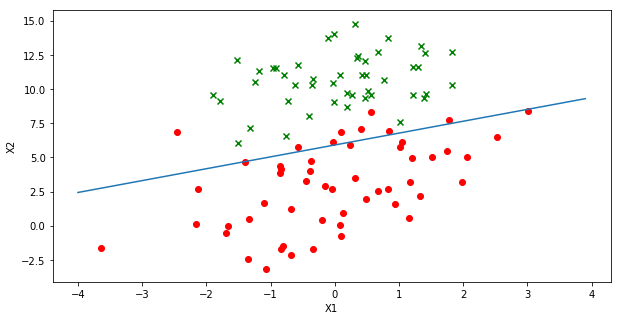

In [19]:
plotLine(data, label, weights)